# Tensorflow & Keras

### Install (or try colab)
* https://www.tensorflow.org/install
* https://keras.io/ko/

In [1]:
from tensorflow import keras
from keras import models 
from keras import layers

## Logistic Regression

In [2]:
net = models.Sequential()
net.add(layers.Dense(1,activation='sigmoid')) # 출력(units) 1개인 레이어를 생성
net.compile(loss='binary_crossentropy',optimizer='adam',metrics=['binary_accuracy']) # cost function = cross entropy, optimizer 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X=np.array([-3,-2,-0.5,-1,2,1.5])
y=np.array([0,0,0,1,1,1])

plt.plot(X,[i if i==1 else None for i in y],'rs')
plt.plot(X,[i if i==0 else None for i in y],'bo')

In [4]:
net.fit(X, y, epochs=1000, verbose=0)

In [5]:
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
net.layers[0].get_weights()

[array([[0.726402]], dtype=float32), array([0.38861227], dtype=float32)]

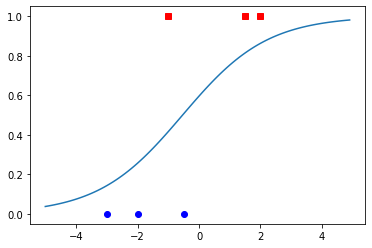

In [7]:
x=np.arange(-5,5,0.1)
plt.plot(x,net.predict(x))

plt.plot(X,[i if i==1 else None for i in y],'rs')
plt.plot(X,[i if i==0 else None for i in y],'bo')

In [8]:
net.predict(X)

array([[0.14299992],
       [0.25650924],
       [0.5063525 ],
       [0.4163465 ],
       [0.86311615],
       [0.8143028 ]], dtype=float32)

## (Multivariable) Logistic Regression

### AND and OR gate

| $x_1$ | $x_2$ | AND | OR  |
| --- | --- | --- | --- |
| 1   |  1  |  1  |  1  |
| 1   |  0  |  0  |  1  |
| 0   |  1  |  0  |  1  |
| 0   |  0  |  0  |  0  |


In [30]:
X = np.array([[1,1],[1,0],[0,1],[0,0]])
AND = np.array([1,0,0,0])
OR = np.array([1,1,1,0])

In [31]:
net_and = models.Sequential()
net_and.add(layers.Dense(1, activation='sigmoid'))
net_and.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

net_or = models.Sequential()
net_or.add(layers.Dense(1, activation='sigmoid')) 
net_or.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [37]:
from keras.utils import to_categorical

AND_train = to_categorical(AND)
OR_train = to_categorical(OR)
AND

array([1, 0, 0, 0])

In [33]:
net_and.fit(X, AND, epochs=1000, verbose=0)
net_or.fit(X, OR, epochs=1000, verbose=0)

In [19]:
net_and.predict(X)

array([[0.25034472],
       [0.24263316],
       [0.29896116],
       [0.29033202]], dtype=float32)

In [21]:
net_or.predict(X)

array([[0.9589777 ],
       [0.8106465 ],
       [0.81758696],
       [0.4507971 ]], dtype=float32)

In [22]:
net_and.get_weights()

[array([[-0.24452496],
        [ 0.0415225 ]], dtype=float32), array([-0.8937721], dtype=float32)]

In [23]:
net_or.get_weights()

[array([[1.6516668],
        [1.6975346]], dtype=float32), array([-0.19745058], dtype=float32)]

## Softmax (multi input / multi output)
$$ f_i(z)=\frac{e^{z_i}}{\sum_j e^{z_j}} $$

In [24]:
from sklearn import datasets
from keras.utils import to_categorical

iris = datasets.load_iris() # 분꽃
X = np.array(iris["data"]) 
y = np.array(iris["target"]).reshape(-1, 1) # setosa=0, versicolor=1, virginica=2
y_train = to_categorical(y)

In [27]:
sm = models.Sequential()
sm.add(layers.Dense(3, activation='softmax'))
sm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
sm.fit(X, y_train, epochs=1000, verbose=0)

In [29]:
sm.evaluate(X, y_train)

5/5 [==============================] - 0s 513us/step - loss: 0.2177 - accuracy: 0.9600


[0.2177245318889618, 0.9599999785423279]